In [19]:
import numpy as np
import pandas as pd
import utils

%load_ext autoreload
%autoreload 2

# Sensitivity, Specificity, Precision

### Q1. Given a test result is positive, what's the probability that the patient is really positive?

From the Bayesian's rule:

$$Pr(real=P|test=P) = \frac{Pr(test=P|real=P)*Pr(real=P)}{Pr(test=P)} = \frac{Pr(test=P|real=P)*Pr(real=P)}{Pr(test=P|real=P)*Pr(real=P) + Pr(test=P|real=N)*Pr(real=N)}$$

Therefore,
$$ Pr(real=P|test=P) = \frac{Sensitivity * Prior}{Sensitivity * Prior + (1-Specificity)*(1-Prior)} \;\;\;\;\;\;(1)$$|

As of 4/21/2020, IL "confirmed" 33k, with population 12.67M, So the prior 
$$Pr(P)\approx 33k/12.67M = 0.26\% $$

As of 4/24/2020, NY "confirmed" 271k, with population 19.45M, So the prior 
$$Pr(P)\approx 271k/19.45M = 1.39\% $$

In the whole U.S., "confirmed" 827k, with population 328M, so the prior
$$Pr(P)\approx 827k/328M = 0.25\% $$

$$Sensitivity = Pr(test=P | real=P)$$
$$Specificity = Pr(test=N | real=N)$$
$$Prior = Pr(real=P)$$

$$ Pr(real=P|test=P) \approx \frac{80.3\%*.05\%}{80.3\% * .05\% + (1-99.5\%)*(1-.05\%)} \approx 8.5\%$$

In [22]:
prior = 0.002

In [2]:
def posterior_pos(sen, spe, prior):
    return sen*prior / (sen * prior + (1-spe) * (1 - prior))

In [12]:
1.1/1900

0.0005789473684210527

In [202]:
posterior_pos(.803, .995, prior=.013)

0.679003512423572

In [51]:
x = np.arange(1e-4, .3, 1e-4) * 100
sens = 0.99
frm = pd.DataFrame({'prior (%)': x, 
                    '99.8% specificity': posterior_pos(sens, .998, x/100) * 100,
                    '99.5% specificity': posterior_pos(sens, .995, x/100) *100, 
                   '99% specificity': posterior_pos(sens, .99, x/100) * 100})


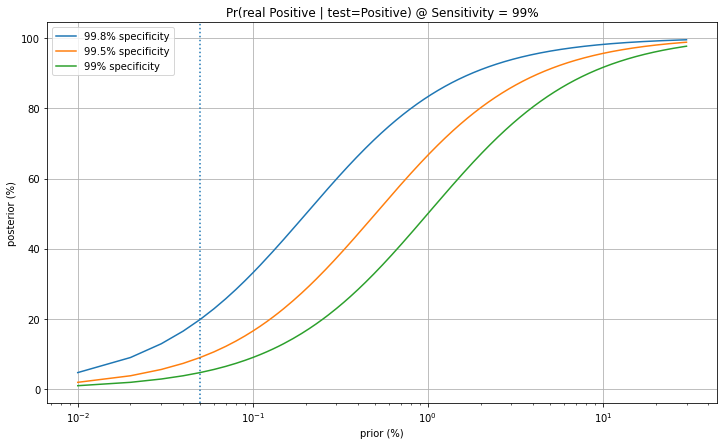

In [53]:
ax = frm.plot(x='prior (%)', grid=True, figsize=(12, 7), 
              title='Pr(real Positive | test=Positive) @ Sensitivity = 99%',
             logx=True)
ax.set_ylabel('posterior (%)')
ax.axvline(x=0.05, linestyle=':')

### Q2. Given a test result is negative, what's the probability that the patient is really negative?

$$ Pr(N|test=N) = \frac{Pr(test=N|N) * Pr(N)}{Pr(test=N)} = \frac{Pr(test=N|N) * Pr(N)}{Pr(test=N|N) * Pr(N) + Pr(test=N|P) * Pr(P)}$$

Therefore,

$$ Pr(N|test=N) = \frac{Specificity * Pr(N)}{Specificity * Pr(N) + (1-Sensitivity)*Pr(P)} $$


In [25]:
def posterior_neg(sen, spe, prior):
    return spe * (1-prior) / (spe * (1-prior) + (1-sen) * prior)

In [26]:
posterior_neg(.803, .995, 0.0005)

0.999900965311718

## Specificity Study

#### Following is quoted from the [preprint](https://www.medrxiv.org/content/10.1101/2020.04.14.20062463v1.full.pdf):

"The test kit used in this study (Premier Biotech, Minneapolis, MN) was tested in a Stanford laboratory
prior to field deployment. Among 37 samples of known PCR-positive COVID-19 patients with positive
IgG or IgM detected on a locally-developed ELISA test, 25 were kit-positive. A sample of 30 pre-COVID
samples from hip surgery patients were also tested, and all 30 were negative. The manufacturer’s test
characteristics relied on samples from clinically confirmed COVID-19 patients as positive gold standard
and pre-COVID sera for negative gold standard. Among 75 samples of clinically confirmed COVID-19
patients with positive IgG, 75 were kit-positive, and among 85 samples with positive IgM, 78 were kitpositive. Among 371 pre-COVID samples, 369 were negative. Our estimates of sensitivity based on the
manufacturer’s and locally tested data were 91.8% (using the lower estimate based on IgM, 95 CI 83.8-
96.6%) and 67.6% (95 CI 50.2-82.0%), respectively. Similarly, our estimates of specificity are 99.5% (95
CI 98.1-99.9%) and 100% (95 CI 90.5-100%). A combination of both data sources provides us with a
combined sensitivity of 80.3% (95 CI 72.1-87.0%) and a **specificity of 99.5% (95 CI 98.3-99.9%)**"

#### Now let's consider a similar toy problem:

Let the random variable $X$ be the test result of a negative sample. $X=\{0, 1\}$, 1 means positive, 0 means negative, and $Pr(X=1)=p$.  So $X$ follows a Bernouli distribution $X \sim B(p)$  

In order to estimate $p$, we drew N=400 samples (i.i.d.), and found 2 of them are positive, ie, $X_i=1$ in two cases

#### Q1: Let the sample mean be $p$'s estimator, ie,  $\hat{p} = m = \frac{1}{N}\Sigma_i X_i$.  What is the expectation and variance of $\hat{p}$ ?

#### A1:

From the example, we can estimate $ \hat{p} = m = 2/400 = 0.5\% $.  Now let's check the expectation this estimate.

$$E[\hat{p}] = E\big[\frac{1}{N} \sum_i X_i\big] = \frac{1}{N} \sum_i E[X_i] = p$$

So the estimator $\hat{p}$ is unbiased. 



Next we check the variance of the estimator:

$$Var[\hat{p}] = Var\big[\frac{1}{N} \sum_i X_i\big] $$

Due to i.i.d, all the covariance terms are zero, so

$$ Var[\hat{p}] = \frac{1}{N^2} \sum_i Var[X_i] = \frac{Var[X_i]}{N} = \frac{p(1-p)}{N} $$


Since the sample variance is a consistent estimator of $Var[X_i]$, so we can calculate the sample variance of X
$$s_X^2 = \frac{\sum_i (X_i-m)^2}{N-1} =\frac{0.005^2 * 398 + 0.995^2*2}{399} = .004987$$

Then the estimator s.d. of $\hat{p}$ is
$$s_p = \sqrt{s_X^2/N} = 0.00353 $$

So the estimate of p is $\hat{p} = 0.5\%$ and $s_p = 0.353\%$

In [37]:
s2 = (.005**2 * 398 + .995**2*2) / 399
print('s.d. of p_hat', np.sqrt(s2/400))

s.d. of p_hat 0.0035311006328336203


#### Q2. What's the 95% CI of $\hat{p}$ ?

Asuming $\hat{p}$ follows a normal distribution $\hat{p} \sim N(m, s_p)$, then the 95% CI is $0.5\% \pm 1.96*0.35\%$ 

Of course, the above goes out of bound, and we know $\hat{p}$ doesn't follows a normal distribution.  

A proper way is to use a bootstrap (resampling with replacement).

In [127]:
print(.005 + 1.96 * .0035, .005 - 1.96 * .0035)

0.011859999999999999 -0.0018599999999999997


In [195]:
N = 400
x = np.zeros(N)
x[0] = 1   # should not matter as far as two of them are 1
x[1] = 1

batch_size = 5000
resample = 1000
idx = np.random.uniform(0, 400, size=(resample, batch_size)).astype(int)
print('index shape: ', idx.shape, ', index min:', np.min(idx), ', index max:', np.max(idx))

index shape:  (1000, 5000) , index min: 0 , index max: 399


In [196]:
p_samples = np.sum(x[idx], axis=1) / float(batch_size)

print(np.mean(p_samples), np.min(p_samples), np.max(p_samples))

0.0050146 0.0018 0.0088


In [197]:
cdf = np.zeros(batch_size)
for i in range(batch_size):
    if i == 0 or cdf[i-1] != 1.0:
        cdf[i] = np.sum(p_samples <= float(i) / batch_size) / float(len(p_samples))
    else:
        cdf[i] = 1.0

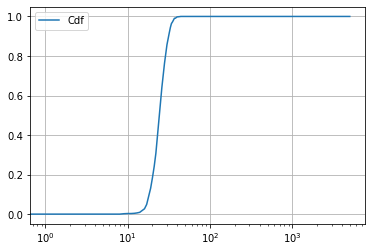

In [198]:
frm = pd.DataFrame({'Cdf': cdf})
frm.plot(logx=True, grid=True)

In [199]:
np.searchsorted(cdf, 0.025) / float(batch_size)

0.0032

In [200]:
np.searchsorted(cdf, 0.975) / float(batch_size)

0.0072